In [57]:
import pandas as pd
import datetime 

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Analyse
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [62]:
df = pd.read_csv("data/sncf.csv")

In [63]:
df

,OBJECT,DATE,FULL_DATE,YEAR,MONTH,TIME
0,Sac à dos,2017-12-31,2017-12-31 11:45:16,2017,12,11:45:16
1,"Porte-monnaie, portefeuille",2017-12-31,2017-12-31 08:35:34,2017,12,08:35:34
2,Carte d'abonnement,2017-12-31,2017-12-31 08:28:26,2017,12,08:28:26
3,Carte de crédit,2017-12-31,2017-12-31 08:05:06,2017,12,08:05:06
4,"Valise, sac sur roulettes",2017-12-31,2017-12-31 07:58:14,2017,12,07:58:14
...,...,...,...,...,...,...
18088,"Téléphone portable protégé (étui, coque,…)",2023-01-02,2023-01-02 05:56:37,2023,1,05:56:37
18089,"Carte d'identité, passeport, permis de conduire",2023-01-01,2023-01-01 17:28:30,2023,1,17:28:30
18090,"AirPod, casque audio, écouteurs",2023-01-01,2023-01-01 14:58:24,2023,1,14:58:24
18091,Sac à main,2023-01-01,2023-01-01 07:03:54,2023,1,07:03:54


In [64]:
df[["year", "month", "DAY"]] = df["DATE"].str.split("-", expand = True)

In [54]:
df.describe()

,YEAR,MONTH
count,18093.000000,18093.000000
mean,2018.988670,6.593158
std,1.762368,3.400217
min,2017.000000,1.000000
25%,2017.000000,4.000000
50%,2019.000000,7.000000
75%,2021.000000,9.000000
max,2023.000000,12.000000


In [65]:

# convert the 'Date' column to datetime format
df['DATE']= pd.to_datetime(df['DATE'])


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18093 entries, 0 to 18092
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   OBJECT     18093 non-null  object        
 1   DATE       18093 non-null  datetime64[ns]
 2   FULL_DATE  18093 non-null  object        
 3   YEAR       18093 non-null  int64         
 4   MONTH      18093 non-null  int64         
 5   TIME       18093 non-null  object        
 6   year       18093 non-null  object        
 7   month      18093 non-null  object        
 8   DAY        18093 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.2+ MB


In [67]:
df["WEEKDAY"] = df["DATE"].dt.day_name()

In [68]:
df

,OBJECT,DATE,FULL_DATE,YEAR,MONTH,TIME,year,month,DAY,WEEKDAY
0,Sac à dos,2017-12-31,2017-12-31 11:45:16,2017,12,11:45:16,2017,12,31,Sunday
1,"Porte-monnaie, portefeuille",2017-12-31,2017-12-31 08:35:34,2017,12,08:35:34,2017,12,31,Sunday
2,Carte d'abonnement,2017-12-31,2017-12-31 08:28:26,2017,12,08:28:26,2017,12,31,Sunday
3,Carte de crédit,2017-12-31,2017-12-31 08:05:06,2017,12,08:05:06,2017,12,31,Sunday
4,"Valise, sac sur roulettes",2017-12-31,2017-12-31 07:58:14,2017,12,07:58:14,2017,12,31,Sunday
...,...,...,...,...,...,...,...,...,...,...
18088,"Téléphone portable protégé (étui, coque,…)",2023-01-02,2023-01-02 05:56:37,2023,1,05:56:37,2023,01,02,Monday
18089,"Carte d'identité, passeport, permis de conduire",2023-01-01,2023-01-01 17:28:30,2023,1,17:28:30,2023,01,01,Sunday
18090,"AirPod, casque audio, écouteurs",2023-01-01,2023-01-01 14:58:24,2023,1,14:58:24,2023,01,01,Sunday
18091,Sac à main,2023-01-01,2023-01-01 07:03:54,2023,1,07:03:54,2023,01,01,Sunday


In [69]:
#Nombre d'objet perdus par jour de la semaine
df.groupby(["WEEKDAY"]).count()

,OBJECT,DATE,FULL_DATE,YEAR,MONTH,TIME,year,month,DAY
WEEKDAY,,,,,,,,,
Friday,2585,2585,2585,2585,2585,2585,2585,2585,2585
Monday,3286,3286,3286,3286,3286,3286,3286,3286,3286
Saturday,2493,2493,2493,2493,2493,2493,2493,2493,2493
Sunday,2064,2064,2064,2064,2064,2064,2064,2064,2064
Thursday,2683,2683,2683,2683,2683,2683,2683,2683,2683
Tuesday,2570,2570,2570,2570,2570,2570,2570,2570,2570
Wednesday,2412,2412,2412,2412,2412,2412,2412,2412,2412


In [70]:
#Nombre d'bjet prdus par année
df.groupby(["YEAR"]).count()

,OBJECT,DATE,FULL_DATE,MONTH,TIME,year,month,DAY,WEEKDAY
YEAR,,,,,,,,,
2017,4614,4614,4614,4614,4614,4614,4614,4614,4614
2018,4364,4364,4364,4364,4364,4364,4364,4364,4364
2019,3005,3005,3005,3005,3005,3005,3005,3005,3005
2020,1526,1526,1526,1526,1526,1526,1526,1526,1526
2021,1915,1915,1915,1915,1915,1915,1915,1915,1915
2022,2645,2645,2645,2645,2645,2645,2645,2645,2645
2023,24,24,24,24,24,24,24,24,24


In [71]:
#Nombre d'bjet prdus par année
df.groupby(["MONTH"]).count()

,OBJECT,DATE,FULL_DATE,YEAR,TIME,year,month,DAY,WEEKDAY
MONTH,,,,,,,,,
1,1547,1547,1547,1547,1547,1547,1547,1547,1547
2,1449,1449,1449,1449,1449,1449,1449,1449,1449
3,1369,1369,1369,1369,1369,1369,1369,1369,1369
4,1201,1201,1201,1201,1201,1201,1201,1201,1201
5,1380,1380,1380,1380,1380,1380,1380,1380,1380
6,1613,1613,1613,1613,1613,1613,1613,1613,1613
7,1761,1761,1761,1761,1761,1761,1761,1761,1761
8,1524,1524,1524,1524,1524,1524,1524,1524,1524
9,1762,1762,1762,1762,1762,1762,1762,1762,1762


In [24]:
df['NBR_OBJECT'] = df['OBJECT'].count()
df

,OBJECT,DATE,FULL_DATE,YEAR,MONTH,TIME,WEEKDAY,NBR_OBJECT
0,Sac à dos,2017-12-31,2017-12-31 11:45:16,2017,12,11:45:16,Sunday,18093
1,"Porte-monnaie, portefeuille",2017-12-31,2017-12-31 08:35:34,2017,12,08:35:34,Sunday,18093
2,Carte d'abonnement,2017-12-31,2017-12-31 08:28:26,2017,12,08:28:26,Sunday,18093
3,Carte de crédit,2017-12-31,2017-12-31 08:05:06,2017,12,08:05:06,Sunday,18093
4,"Valise, sac sur roulettes",2017-12-31,2017-12-31 07:58:14,2017,12,07:58:14,Sunday,18093
...,...,...,...,...,...,...,...,...
18088,"Téléphone portable protégé (étui, coque,…)",2023-01-02,2023-01-02 05:56:37,2023,1,05:56:37,Monday,18093
18089,"Carte d'identité, passeport, permis de conduire",2023-01-01,2023-01-01 17:28:30,2023,1,17:28:30,Sunday,18093
18090,"AirPod, casque audio, écouteurs",2023-01-01,2023-01-01 14:58:24,2023,1,14:58:24,Sunday,18093
18091,Sac à main,2023-01-01,2023-01-01 07:03:54,2023,1,07:03:54,Sunday,18093


In [ ]:
#Nombre d'objet perdus par mois : 6.6


In [12]:
#df[['year', 'month', 'day']] = df[['year', 'month', 'day']].astype(int)

KeyError: "None of [Index(['year', 'month', 'day'], dtype='object')] are in the [columns]"

In [72]:
df

,OBJECT,DATE,FULL_DATE,YEAR,MONTH,TIME,year,month,DAY,WEEKDAY
0,Sac à dos,2017-12-31,2017-12-31 11:45:16,2017,12,11:45:16,2017,12,31,Sunday
1,"Porte-monnaie, portefeuille",2017-12-31,2017-12-31 08:35:34,2017,12,08:35:34,2017,12,31,Sunday
2,Carte d'abonnement,2017-12-31,2017-12-31 08:28:26,2017,12,08:28:26,2017,12,31,Sunday
3,Carte de crédit,2017-12-31,2017-12-31 08:05:06,2017,12,08:05:06,2017,12,31,Sunday
4,"Valise, sac sur roulettes",2017-12-31,2017-12-31 07:58:14,2017,12,07:58:14,2017,12,31,Sunday
...,...,...,...,...,...,...,...,...,...,...
18088,"Téléphone portable protégé (étui, coque,…)",2023-01-02,2023-01-02 05:56:37,2023,1,05:56:37,2023,01,02,Monday
18089,"Carte d'identité, passeport, permis de conduire",2023-01-01,2023-01-01 17:28:30,2023,1,17:28:30,2023,01,01,Sunday
18090,"AirPod, casque audio, écouteurs",2023-01-01,2023-01-01 14:58:24,2023,1,14:58:24,2023,01,01,Sunday
18091,Sac à main,2023-01-01,2023-01-01 07:03:54,2023,1,07:03:54,2023,01,01,Sunday


In [ ]:
#df_c = df[df['YEAR']>= 2016] 


In [73]:
df.describe()

,YEAR,MONTH
count,18093.000000,18093.000000
mean,2018.988670,6.593158
std,1.762368,3.400217
min,2017.000000,1.000000
25%,2017.000000,4.000000
50%,2019.000000,7.000000
75%,2021.000000,9.000000
max,2023.000000,12.000000


# Entre 2016 et 2022
#Nombre d'objet perdus par mois : 6.6

# 2. VISUALISATION 

<AxesSubplot: xlabel='MONTH', ylabel='OBJECT'>

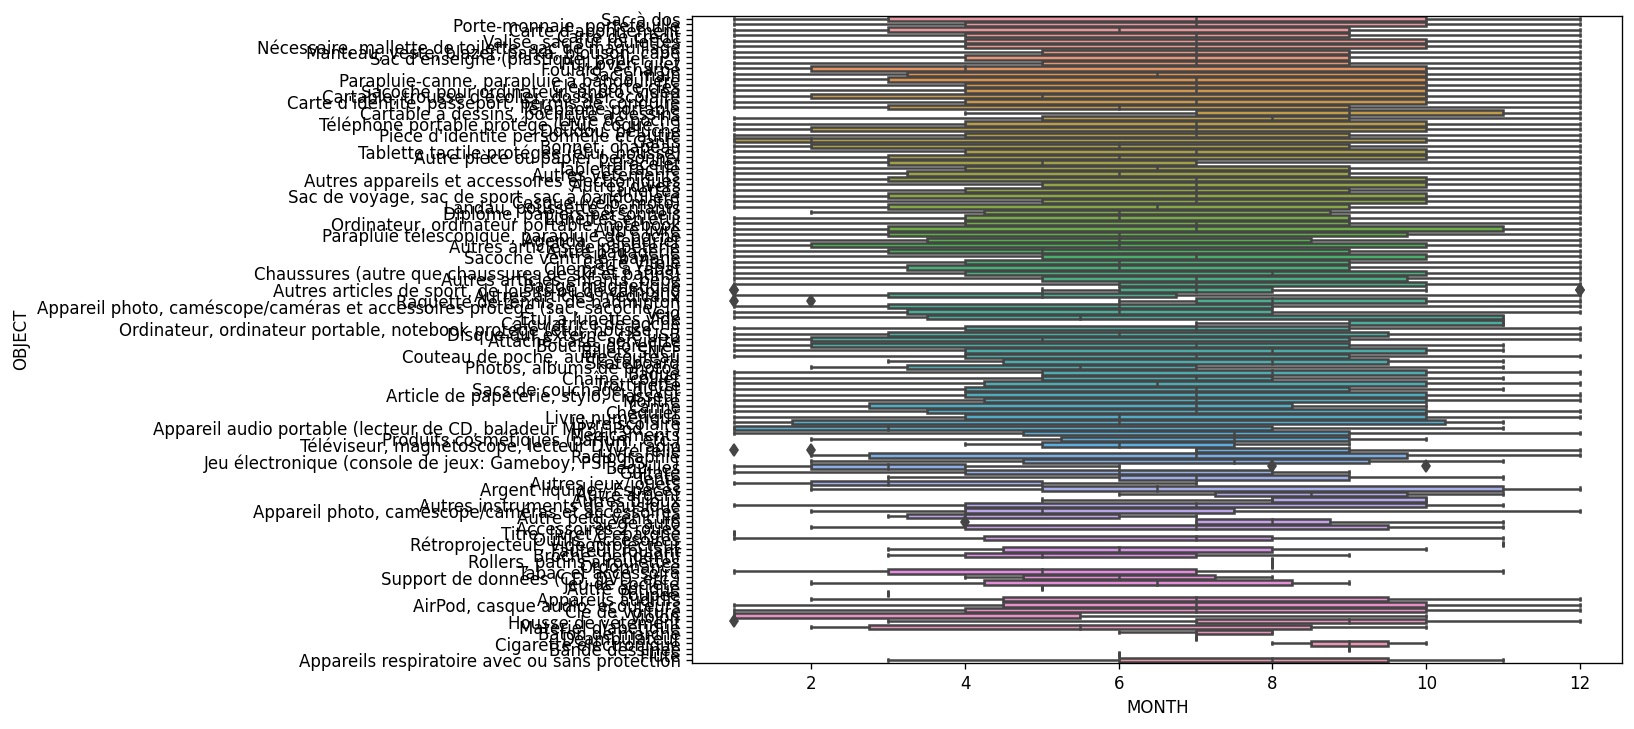

In [74]:
sns.boxplot(data=df, x="MONTH", y="OBJECT")

# III ANALYSES

In [75]:
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [76]:
df

,OBJECT,DATE,FULL_DATE,YEAR,MONTH,TIME,year,month,DAY,WEEKDAY
0,Sac à dos,2017-12-31,2017-12-31 11:45:16,2017,12,11:45:16,2017,12,31,Sunday
1,"Porte-monnaie, portefeuille",2017-12-31,2017-12-31 08:35:34,2017,12,08:35:34,2017,12,31,Sunday
2,Carte d'abonnement,2017-12-31,2017-12-31 08:28:26,2017,12,08:28:26,2017,12,31,Sunday
3,Carte de crédit,2017-12-31,2017-12-31 08:05:06,2017,12,08:05:06,2017,12,31,Sunday
4,"Valise, sac sur roulettes",2017-12-31,2017-12-31 07:58:14,2017,12,07:58:14,2017,12,31,Sunday
...,...,...,...,...,...,...,...,...,...,...
18088,"Téléphone portable protégé (étui, coque,…)",2023-01-02,2023-01-02 05:56:37,2023,1,05:56:37,2023,01,02,Monday
18089,"Carte d'identité, passeport, permis de conduire",2023-01-01,2023-01-01 17:28:30,2023,1,17:28:30,2023,01,01,Sunday
18090,"AirPod, casque audio, écouteurs",2023-01-01,2023-01-01 14:58:24,2023,1,14:58:24,2023,01,01,Sunday
18091,Sac à main,2023-01-01,2023-01-01 07:03:54,2023,1,07:03:54,2023,01,01,Sunday
